In [51]:
import np
import pandas as pd

# Excel-Datei laden 
df = pd.read_excel('/Users/leonievoss/Desktop/Computational Social Science BANISCH/relnumbers19.xlsx') 

# Fraktionslose entfernen
data = df[df['Begriff'] != 'fraktionslos']


# Extraktion der Worte (Liste)
worte = list(data.columns)

# Der erste Eintrag "Begriff" wird nicht gebraucht.
worte = worte[1:]
print('\nDas sind die Worte: \n')
print(worte)

# Extrahieren der Parteibezeichnung (Liste)
parteien = list(data.loc[:,'Begriff'])
print('\nDas sind die Parteien: \n')
print(parteien)

# Extrahieren der Zahlen, um eine Matrix zu erhalten
data_np = np.array(data.iloc[:,1:])
print('\nDas sind die Zahlen als numpy-Matrix: \n')
print(data_np)


Das sind die Worte: 

['Migranten', 'Flüchtlinge', 'Ausländer', 'Asylbewerber', 'Asylanten', 'Einwanderer', 'Zuwanderer', 'Neuankömmlinge', 'Geflüchtete', 'Gastarbeiter', 'Asylbetrüger', 'Wirtschaftsflüchtlinge', 'Invasoren', 'Sozialschmarotzer', 'Migration', 'Flüchtlingswelle', 'Remigration', 'Integration', 'Flüchtlingskrise', 'Willkommenskultur', 'Rückführung', 'Abschiebung', 'Überfremdung', 'Asylmissbrauch', 'Fachkräftezuwanderung', 'Chancenvielfalt', 'Parallelgesellschaften', 'Einwanderungsquote', 'Bleiberecht', 'Migrationshintergrund']

Das sind die Parteien: 

['SPD', 'FDP', 'CDU/CSU', 'Linke', 'Grüne', 'AfD']

Das sind die Zahlen als numpy-Matrix: 

[[0.0096  0.0346  0.0111  0.004   0.00019 0.0027  0.0027  0.0002  0.0144
  0.0026  0.      0.0004  0.      0.      0.0376  0.      0.      0.0276
  0.0015  0.0008  0.0034  0.0053  0.      0.      0.0019  0.      0.0011
  0.      0.0008  0.006  ]
 [0.0084  0.0282  0.0124  0.0054  0.      0.003   0.0037  0.      0.0047
  0.001   0.   

Parteien ohne definierte Farbe: []


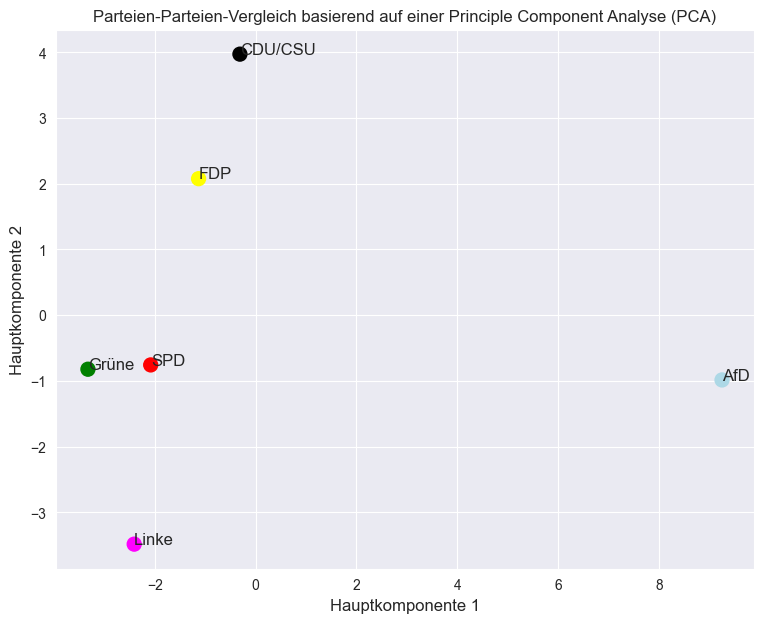

Erklärte Varianz der Hauptkomponenten: [0.62165123 0.19792456]


In [52]:
# Parteien-Parteien-Vergleich mit PCA für die 19. (oder 20.) Wahlperiode

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Pfad zur Excel-Datei (anpassen je nach Wahlperiode)
file_path = '/Users/leonievoss/Desktop/Computational Social Science BANISCH/relnumbers19.xlsx'

# Excel-Datei laden
df = pd.read_excel(file_path)

# Die 'Begriff'-Spalte (Parteinamen) extrahieren und die restlichen numerischen Daten verwenden
partei_labels = df['Begriff']

# Fraktionslose entfernen
df_filtered = df[df['Begriff'] != 'fraktionslos']

# Aktualisierte Parteinamen und numerische Daten nach Entfernung der fraktionslosen Reden
partei_labels_filtered = df_filtered['Begriff']
numerische_daten = df_filtered.drop(columns=['Begriff'])

# Daten standardisieren (Mittelwert = 0, Varianz = 1)
scaler = StandardScaler()
standardisierte_daten = scaler.fit_transform(numerische_daten)

# PCA durchführen
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardisierte_daten)

# DataFrame mit den Hauptkomponenten erstellen
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Partei'] = partei_labels

# Definieren einer benutzerdefinierten Farbpalette
farben = {
    'SPD': 'red',
    'AfD': 'lightblue',
    'Grüne': 'green',
    'CDU/CSU': 'black',
    'FDP': 'yellow',
    'Linke': 'magenta'
}

# Farben den Parteien zuordnen
df_pca['Farbe'] = df_pca['Partei'].map(farben).fillna('grey')

# Parteien ohne zugewiesene Farbe anzeigen
fehlende_farben = df_pca[df_pca['Farbe'] == 'grey']['Partei'].unique()
print("Parteien ohne definierte Farbe:", fehlende_farben)

# Visualisierung der PCA-Ergebnisse mit benutzerdefinierten Farben
plt.figure(figsize=(9, 7))

# Scatterplot der Parteien mit benutzerdefinierten Farben
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Farbe'], s=100)

# Beschriftungen für jede Partei hinzufügen
for i in range(df_pca.shape[0]):
    plt.text(df_pca['PC1'][i], df_pca['PC2'][i], df_pca['Partei'][i], fontsize=12)

# Achsenbeschriftungen anpassen
plt.title('Parteien-Parteien-Vergleich basierend auf einer Principle Component Analyse (PCA)')
plt.xlabel('Hauptkomponente 1', fontsize = 12)  # X-Achse
plt.ylabel('Hauptkomponente 2', fontsize = 12)  # Y-Achse

# Gitter und Legende anzeigen
plt.grid(True)
plt.show()

# Erkläre die Varianz, die durch jede Hauptkomponente erklärt wird
print(f"Erklärte Varianz der Hauptkomponenten: {pca.explained_variance_ratio_}")

# Die Parteien, die im Scatterplot nahe beieinander liegen, haben eine ähnliche Wortnutzung. Parteien, die weit voneinander entfernt sind, unterscheiden sich stark in ihrer Wortwahl. Die erklärte Varianz gibt an, wie viel der Unterschiede zwischen den Parteien durch die Hauptkomponenten erfasst werden. Je höher der Wert, desto mehr Information steckt in diesen zwei Komponenten.

In [53]:
# Erkläre die Varianz, die durch jede Hauptkomponente erklärt wird, zusammen addiert hat man dann die Varianz, die die beiden Hauptkomponenten erklären
print(f"Erklärte Varianz der Hauptkomponenten: {pca.explained_variance_ratio_}")

Erklärte Varianz der Hauptkomponenten: [0.62165123 0.19792456]


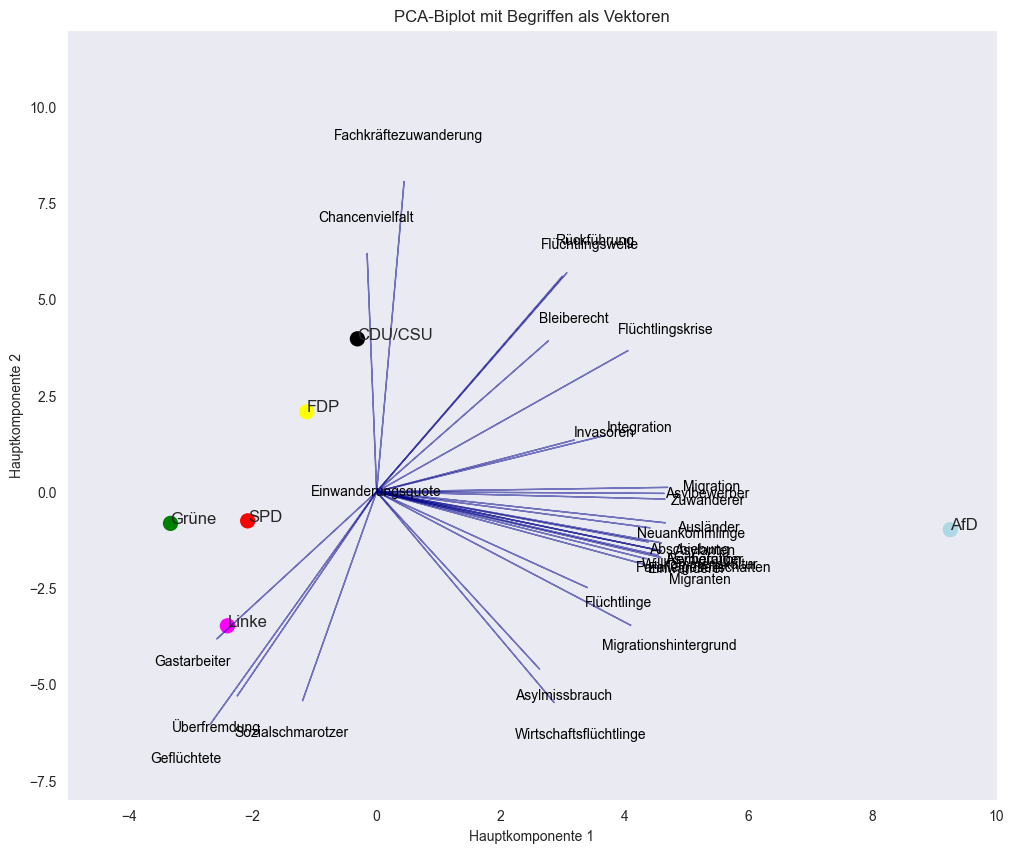

In [54]:
# Funktion für die Erstellung eines Biplots (Begriffe als Vektoren)
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(12,10))
    xs = score[:, 0]
    ys = score[:, 1]
    plt.scatter(xs, ys, c=df_pca['Farbe'], s=100)
    # Beschriftungen für jede Partei hinzufügen
    for i in range(df_pca.shape[0]):
        plt.text(df_pca['PC1'][i], df_pca['PC2'][i], df_pca['Partei'][i], fontsize=12)

    factor=20;
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, factor*coeff[i, 0], factor*coeff[i, 1], color='darkblue', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(factor*coeff[i, 0] * 1.15, factor*coeff[i, 1] * 1.15, labels[i], color='black', ha='center', va='center')

    plt.xlabel("Hauptkomponente 1")
    plt.ylabel("Hauptkomponente 2")
    plt.grid()
    plt.title("PCA-Biplot mit Begriffen als Vektoren")


biplot(data_pca, np.transpose(pca.components_), labels=worte)

# Set x-axis limits
plt.xlim(-5, 10)
# Set y-axis limits
plt.ylim(-8, 12)
plt.show()


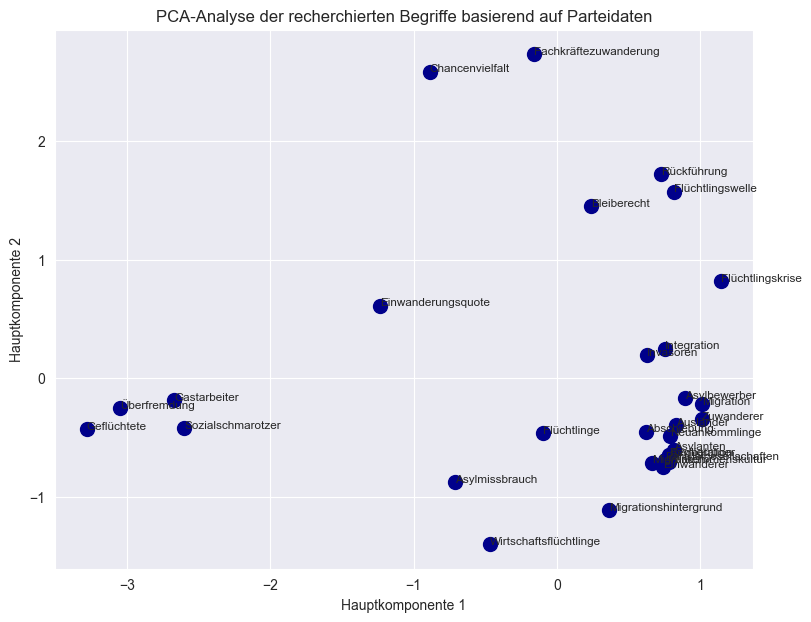

In [55]:
# Worte-Worte-Vergleich
# PCA durchführen
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_standardized.T)  # Transponieren, um Begriffe als Features zu verwenden

# DataFrame mit den Hauptkomponenten erstellen
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
df_pca['Begriff'] = worte

# Visualisierung der PCA-Ergebnisse für Begriffe
plt.figure(figsize=(9, 7))

# Scatterplot der Begriffe
plt.scatter(df_pca['PC1'], df_pca['PC2'], s=100, color = 'darkblue')

# Beschriftungen für jeden Begriff hinzufügen
for i in range(df_pca.shape[0]):
    plt.text(df_pca['PC1'][i], df_pca['PC2'][i], df_pca['Begriff'][i], fontsize=8.5)

# Achsenbeschriftungen anpassen
plt.title('PCA-Analyse der recherchierten Begriffe basierend auf Parteidaten')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')

# Gitter anzeigen
plt.grid(True)
plt.show()

In [56]:
# Erkläre die Varianz, die durch jede Hauptkomponente erklärt wird
print(f"Erklärte Varianz der Hauptkomponenten: {pca.explained_variance_ratio_}")

Erklärte Varianz der Hauptkomponenten: [0.44908283 0.28678334]


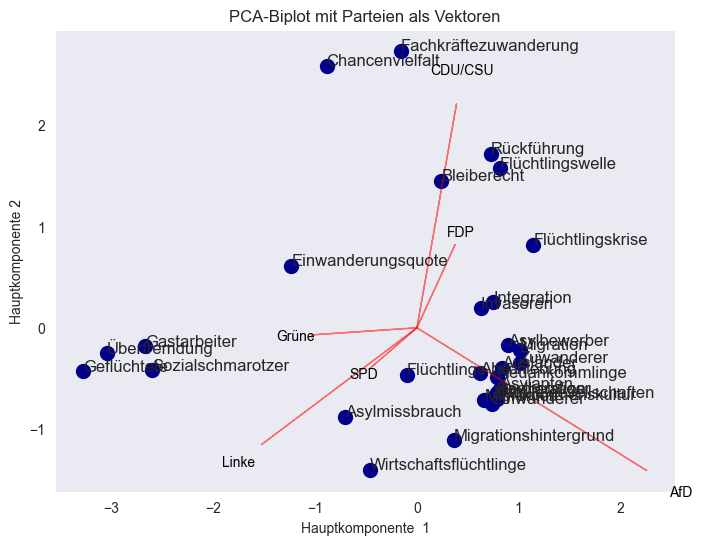

In [57]:
# Funktion für die Erstellung eines Biplots (Parteien als Vektoren)
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(8,6))
    xs = score[:, 0]
    ys = score[:, 1]
    plt.scatter(xs, ys, s=100, color='darkblue')
    # Beschriftungen für jede Partei hinzufügen
    for i in range(df_pca.shape[0]):
        plt.text(df_pca['PC1'][i], df_pca['PC2'][i], df_pca['Begriff'][i], fontsize=12)

    factor=3;
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, factor*coeff[i, 0], factor*coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var"+str(i+1), color='black', ha='center', va='center')
        else:
            plt.text(factor*coeff[i, 0] * 1.15, factor*coeff[i, 1] * 1.15, labels[i], color='black', ha='center', va='center')

    plt.xlabel("Hauptkomponente  1")
    plt.ylabel("Hauptkomponente 2")
    plt.grid()
    plt.title("PCA-Biplot mit Parteien als Vektoren")

biplot(pca_data, np.transpose(pca.components_), labels=parteien)

# Set x-axis limits
#plt.xlim(-5, 10)
# Set y-axis limits
#plt.ylim(-8, 12)
plt.show()  

In [58]:
from scipy.spatial.distance import euclidean, cosine
import matplotlib.pyplot as plt

# Vektoren extrahieren 
# hier kann man beliebige Parteien einfügen für die Ausgabe der jeweiligen Vektoren
partei_1 = df[df['Begriff'] == 'SPD'].iloc[0, 1:].values 
partei_2 = df[df['Begriff'] == 'AfD'].iloc[0, 1:].values

# Anzeige der Vektoren für die beiden zu vergleichenden Parteien
print("SPD Vektor:", partei_1)
print("AfD Vektor:", partei_2)

SPD Vektor: [0.0096 0.0346 0.0111 0.004 0.00019 0.0027 0.0027 0.0002 0.0144 0.0026 0.0
 0.0004 0.0 0.0 0.0376 0.0 0.0 0.0276 0.0015 0.0008 0.0034 0.0053 0.0 0.0
 0.0019 0.0 0.0011 0 0.0008 0.006]
AfD Vektor: [0.0639 0.0541 0.0296 0.027 0.0016 0.0076 0.014 0.0006 0.0041 0.0006
 0.0013 0.0006 0.0003 0.0 0.0891 0.001 0.0006 0.0388 0.0068 0.0095 0.0102
 0.0184 0.0 0.0016 0.0016 0.0 0.0111 0 0.0029 0.0099]


Euklidischer Abstand zwischen SPD und AfD: 0.0876852216738944
Kosinus-Abstand zwischen SPD und AfD: 0.11217357182821042
Vektor-Differenz (SPD - FDP): [-0.0543 -0.019500000000000003 -0.018500000000000003 -0.023 -0.00141
 -0.0049 -0.011300000000000001 -0.00039999999999999996 0.0103 0.002
 -0.0013 -0.00019999999999999993 -0.0003 0.0 -0.0515 -0.001 -0.0006
 -0.011200000000000002 -0.005299999999999999 -0.0087
 -0.0068000000000000005 -0.0131 0.0 -0.0016 0.0002999999999999999 0.0
 -0.01 0 -0.0021 -0.0039000000000000007]


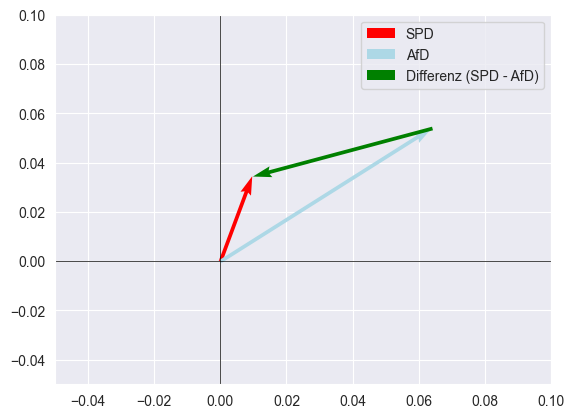

In [59]:
# Berechnung des Euklidischen Abstands: Je kleiner der euklidische Abstand zwischen zwei Punkten (oder Vektoren) ist, desto ähnlicher sind sie in Bezug auf ihre Merkmale. Ein größerer Abstand bedeutet, dass sie sich stärker unterscheiden.
euklidischer_abstand = euclidean(partei_1, partei_2)
print(f"Euklidischer Abstand zwischen SPD und AfD: {euklidischer_abstand}")

# Berechnung des Kosinus-Abstands: Betrachtet den Winkel zwischen Vektoren und ignoriert deren Länge. Nützlich, wenn die Richtung wichtiger ist als die Größe, bei Parteien meistens sinnvoller als euklidischer Abstand
kosinus_abstand = cosine(partei_1, partei_2)
print(f"Kosinus-Abstand zwischen SPD und AfD: {kosinus_abstand}")

# Berechnung der Vektor-Differenz
vektor_differenz = partei_1 - partei_2
print(f"Vektor-Differenz (SPD - FDP): {vektor_differenz}")

# Plot der Vektoren
fig, ax = plt.subplots()

# SPD Vektor grafische Darstellung
ax.quiver(0, 0, partei_1[0], partei_1[1], angles='xy', scale_units='xy', scale=1, color='r', label='SPD')

# FDP Vektor grafische Darstellung
ax.quiver(0, 0, partei_2[0], partei_2[1], angles='xy', scale_units='xy', scale=1, color='lightblue', label='AfD')

# Vektor-Differenz grafische Darstellung
ax.quiver(partei_2[0], partei_2[1], vektor_differenz[0], vektor_differenz[1], angles='xy', scale_units='xy', scale=1, color='g', label='Differenz (SPD - AfD)')

plt.xlim(-0.05, 0.1)
plt.ylim(-0.05, 0.1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

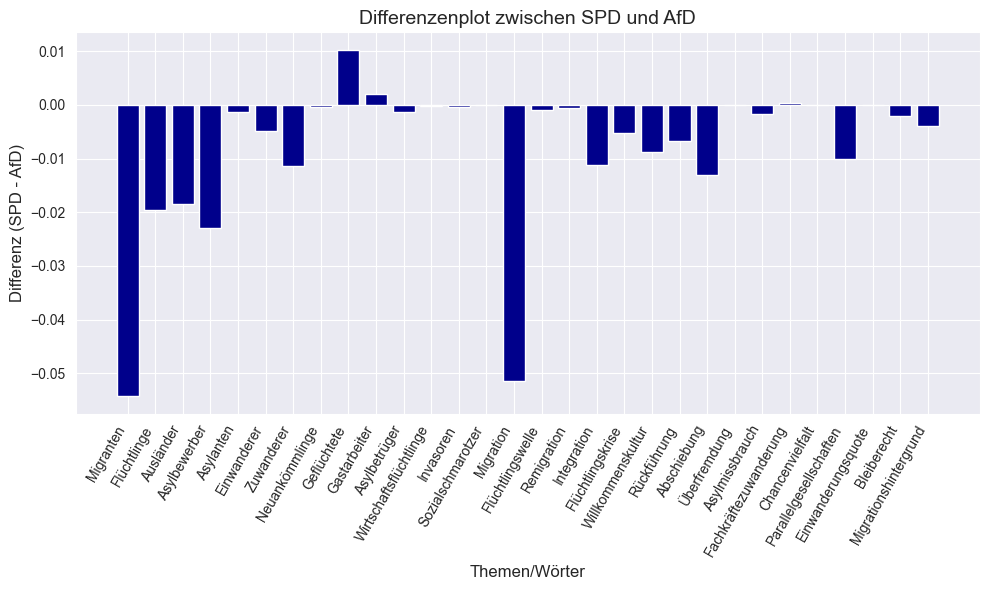

In [60]:
# Differenzenplot zwischen zwei Parteien erstellen: Durch welche Begriffsverwendungen entstehen diese Unterschiede zwischen den zwei ausgewählten Parteien?

import numpy as np
import matplotlib.pyplot as plt


# Vektoren für die Parteien extrahieren
partei_1 = df[df['Begriff'] == 'SPD'].iloc[0, 1:].values  # Werte der SPD (ohne die Parteispalte)
partei_2 = df[df['Begriff'] == 'AfD'].iloc[0, 1:].values  # Werte der FDP (ohne die Parteispalte)

# Differenz berechnen
differenz = partei_1 - partei_2

# Liste der Wörter oder Themen aus den Spaltennamen
themen = df.columns[1:]  # Überspringe die Parteispalte, daher [1:]

# Erstellen des Barplots
plt.figure(figsize=(10, 6))
plt.bar(themen, differenz, color='darkblue')

# Hinzufügen von Titeln und Achsenbeschriftungen
plt.title('Differenzenplot zwischen SPD und AfD', fontsize=14)
plt.xlabel('Themen/Wörter', fontsize=12)
plt.ylabel('Differenz (SPD - AfD)', fontsize=12)

# X-Achse rotieren, um die Themen/Wörter besser lesbar zu machen
plt.xticks(rotation=60, ha='right')

# Anzeigebarplot
plt.tight_layout()
plt.show()